<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Домашнее-задание-&quot;Линейная-алгебра.-Векторы&quot;" data-toc-modified-id="Домашнее-задание-&quot;Линейная-алгебра.-Векторы&quot;-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Домашнее задание "Линейная алгебра. Векторы"</a></span></li><li><span><a href="#Домашнее-задание-&quot;Линейная-алгебра.-Матрицы&quot;" data-toc-modified-id="Домашнее-задание-&quot;Линейная-алгебра.-Матрицы&quot;-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Домашнее задание "Линейная алгебра. Матрицы"</a></span><ul class="toc-item"><li><span><a href="#Задание-1" data-toc-modified-id="Задание-1-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Задание 1</a></span></li><li><span><a href="#Задание-2" data-toc-modified-id="Задание-2-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Задание 2</a></span></li></ul></li><li><span><a href="#Домашнее-задание-&quot;Продвинутая-линейная-алгебра&quot;" data-toc-modified-id="Домашнее-задание-&quot;Продвинутая-линейная-алгебра&quot;-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Домашнее задание "Продвинутая линейная алгебра"</a></span><ul class="toc-item"><li><span><a href="#Задание-1" data-toc-modified-id="Задание-1-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Задание 1</a></span></li><li><span><a href="#Задание-2" data-toc-modified-id="Задание-2-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Задание 2</a></span></li></ul></li><li><span><a href="#Домашнее-задание-&quot;Математический-анализ.-Производная&quot;" data-toc-modified-id="Домашнее-задание-&quot;Математический-анализ.-Производная&quot;-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Домашнее задание "Математический анализ. Производная"</a></span></li><li><span><a href="#Домашнее-задание-&quot;Производная-функции-нескольких-аргументов&quot;" data-toc-modified-id="Домашнее-задание-&quot;Производная-функции-нескольких-аргументов&quot;-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Домашнее задание "Производная функции нескольких аргументов"</a></span></li><li><span><a href="#Домашнее-задание-&quot;Теория-оптимизации&quot;" data-toc-modified-id="Домашнее-задание-&quot;Теория-оптимизации&quot;-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Домашнее задание "Теория оптимизации"</a></span></li></ul></div>

In [2]:
import math
import numpy as np
import sympy as sym
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from numpy import linalg
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from scipy.optimize import differential_evolution

## Домашнее задание "Линейная алгебра. Векторы"

In [2]:
v = np.array([[1, 1], [2, 0], [0, 2]])

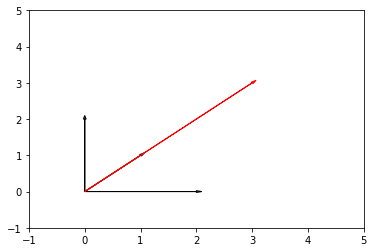

In [3]:
ax = plt.axes()
ax.arrow(0, 0, *v[0], head_width=0.05, head_length=0.1)
ax.arrow(0, 0, *v[1], head_width=0.05, head_length=0.1)
ax.arrow(0, 0, *v[2], head_width=0.05, head_length=0.1)
ax.arrow(0, 0, *(v[0]+v[1]+v[2]), head_width=0.05, head_length=0.1, color = 'r' )
plt.ylim(-1,5)
plt.xlim(-1,5)
plt.show()

In [4]:
def angle(v1, v2, acute):
    angle = np.arccos(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))
    if (acute == True):
        return angle
    else:
        return 2 * np.pi - angle

In [5]:
ang = angle(v[0], v[1], True)
print(f"{round(ang, 3)} rad, {round(ang*(180/np.pi), 3)} deg")

0.785 rad, 45.0 deg


## Домашнее задание "Линейная алгебра. Матрицы"

### Задание 1

In [6]:
m = np.arange(1,10).reshape(3,3)
u = np.eye(3)
m + u

array([[ 2.,  2.,  3.],
       [ 4.,  6.,  6.],
       [ 7.,  8., 10.]])

In [7]:
v = np.arange(1,4)
v

array([1, 2, 3])

In [8]:
# в задании не сказано, левое или правое умножение, так что можно и так и так

print(v.dot(m + u), (m + u).dot(v))

[31. 38. 45.] [15. 34. 53.]


In [9]:
from numpy import linalg

# В задании сказано инвертировать результат умножения матрицы на вектор, 
# но это технически невозможно, так как обратные матрицы определены только 
# для квадратных. Так что инвертируем то, что можно

linalg.inv(m + u)

array([[-6. , -2. ,  3. ],
       [-1. ,  0.5,  0. ],
       [ 5. ,  1. , -2. ]])

### Задание 2

(-200.0, 200.0)

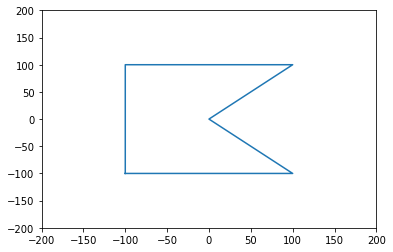

In [10]:
A = [
[-100, -100, 1],
[-100, 100, 1],
[100, 100, 1],
[0, 0, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)
x = A[:,0]
y = A[:,1]

plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

* Уменьшить объект в два раза
* Повернуть на 130 градусов
* Отразить объект относительно прямой y=x
* Выполнить смещение объекта и масштабирование (применить 2 матрицы трансформаций). Смещение на (200, 300) и масштабирование на (0.5, 1.2)


У нас имеется 6 векторов в двумерных однородных координатах, объединенных в массив А. Для того, что бы произвести с массивом операцию трансформации, необходимо произвести ее с каждым вектором.

In [36]:
# Изменение размера 

def figure_scale(A, a, b):
    scale_matrix = np.array([[a, 0, 0], [0, b, 0], [0, 0, 1]])
    A_scale = []
    for i in range(0, len(A)):
        A_transform = scale_matrix.dot(A[i])
        A_scale.append(A_transform)
    return A_scale

(-200.0, 200.0)

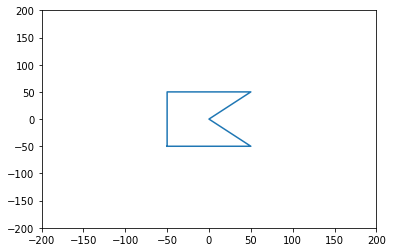

In [37]:
a = 1/2
b = 1/2

x_scale = np.array(figure_scale(A, a, b))[:,0]
y_scale = np.array(figure_scale(A, a, b))[:,1]  
plt.plot(x_scale, y_scale)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

In [38]:
# Поворот 
# В задании не указано - по часовой стрелке или против, так что сделал оба

def figure_rotate(A, deg_angle, clockwise):
    cos_angle = round(math.cos(deg_angle*np.pi/180), 5)
    sin_angle = round(math.sin(deg_angle*np.pi/180), 5)
    if clockwise == True:
        rotate_matrix = np.array([[sin_angle, cos_angle, 0], [cos_angle, -sin_angle, 0], [0, 0, 1]])
    else:
        rotate_matrix = np.array([[cos_angle, -sin_angle, 0], [sin_angle, cos_angle, 0], [0, 0, 1]])
    A_rotate = []
    for i in range(0, len(A)):
        A_transform = rotate_matrix.dot(A[i])
        A_rotate.append(A_transform)
    return A_rotate

(-200.0, 200.0)

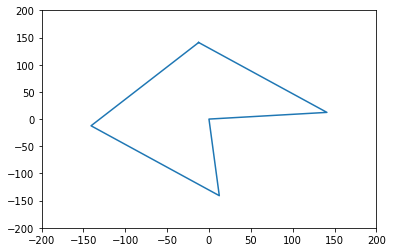

In [39]:
deg_angle = 130

x_rotate = np.array(figure_rotate(A, deg_angle, True))[:,0]
y_rotate = np.array(figure_rotate(A, deg_angle, True))[:,1]  
plt.plot(x_rotate, y_rotate)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

Немного кривовато вышло, не очень врубился, почему

In [40]:
# Отражение относительно осей

def figure_reflect(A, axis):
    if axis == 'x':
        reflect_matrix = np.array([[1, 0, 0], [0, -1, 0], [0, 0, 1]])
    elif axis == 'y':
        reflect_matrix = np.array([[-1, 0, 0], [0, 1, 0], [0, 0, 1]])
    elif axis == 'origin':
        reflect_matrix = np.array([[-1, 0, 0], [0, -1, 0], [0, 0, 1]])
    A_reflect = []
    for i in range(0, len(A)):
        A_transform = reflect_matrix.dot(A[i])
        A_reflect.append(A_transform)
    return A_reflect

In [41]:
# Сдвиг

def figure_translate(A, X, Y):
    translate_matrix = np.array([[1, 0, X], [0, 1, Y], [0, 0, 1]])
    A_translate = []
    for i in range(0, len(A)):
        A_transform = translate_matrix.dot(A[i])
        A_translate.append(A_transform)
    return A_translate

Но у нас-то отражение относительно y=x, а для такой фигуры это эквивалент поворота на 90 градусов и сдвига насколько я это по-быстрому представил)

(-200.0, 300.0)

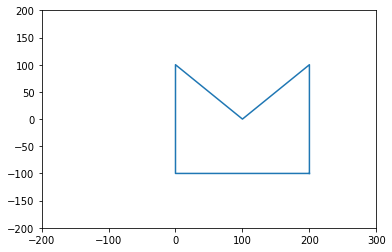

In [45]:
deg_angle = 90
X = 100
Y = 0

x_reflect = np.array(figure_translate(figure_rotate(A, deg_angle, False), X, Y))[:,0]
y_reflect = np.array(figure_translate(figure_rotate(A, deg_angle, False), X, Y))[:,1]  
plt.plot(x_reflect, y_reflect)
plt.ylim([-200, 200])
plt.xlim([-200, 300])

И последнее

(-200.0, 400.0)

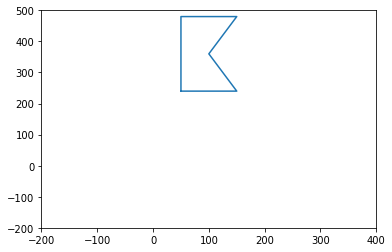

In [47]:
a = 0.5
b = 1.2

X = 200
Y = 300

x_comp = np.array(figure_scale(figure_translate(A, X, Y), a, b))[:,0]
y_comp = np.array(figure_scale(figure_translate(A, X, Y), a, b))[:,1]  
plt.plot(x_comp, y_comp)
plt.ylim([-200, 500])
plt.xlim([-200, 400])

## Домашнее задание "Продвинутая линейная алгебра"

### Задание 1

Матрицы:  
a) Диагональная, ортогональная, но не единичная  
b) Верхнетреугольная, ортогональная  
c) Нижнетреугольная, ортогональная  
d) Матрица, у которой определитель = 1, и все элементы не равны 0  

Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2.

In [10]:
A = np.array([[-1, 0, 0], [0, -1, 0], [0, 0, -1]])
A

array([[-1,  0,  0],
       [ 0, -1,  0],
       [ 0,  0, -1]])

In [11]:
A.dot(A.T)

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

Вообще отметим, что вещественная матрица может быть одновременно ортогональной и диагональной лишь в двух случаях - когда элементы на главной диагонали равны 1 или же -1, потому что

$$\begin{pmatrix}
  d_{11}&\ldots&0\\
  \vdots&\ddots&\vdots\\
  0&\ldots&d_{nn}
\end{pmatrix}*\begin{pmatrix}
  d_{11}&\ldots&0\\
  \vdots&\ddots&\vdots\\
  0&\ldots&d_{nn}
\end{pmatrix}=\begin{pmatrix}
  1&\ldots&0\\
  \vdots&\ddots&\vdots\\
  0&\ldots&1
\end{pmatrix}$$

только если 

\begin{equation*}
 \begin{cases}
   d_{11}^2 = 1, 
   \\
   \ldots,
   \\
   d_{nn}^2 = 1.
 \end{cases}
\end{equation*}

**Для рассмотрения верхних и нижних матриц воспользуемся SymPy, что бы не делать руками то, что может сделать машина**

In [69]:
d = sym.symbols('d1:6')

In [70]:
U = sym.Matrix([[d1, d2, d3], [0, d4, d5], [0, 0, d6]])
U

Matrix([
[d1, d2, d3],
[ 0, d4, d5],
[ 0,  0, d6]])

In [71]:
U*U.T

Matrix([
[d1**2 + d2**2 + d3**2, d2*d4 + d3*d5, d3*d6],
[        d2*d4 + d3*d5, d4**2 + d5**2, d5*d6],
[                d3*d6,         d5*d6, d6**2]])

In [39]:
solution = sym.solve((d3*d6, d2*d4 + d3*d5, d5*d6, d1**2 + d2**2 + d3**2 - 1, d4**2 + d5**2 -1, d6**2 -1), (d1, d2, d3, d4, d5, d6))

In [46]:
solution

[(-1, 0, 0, -1, 0, -1),
 (-1, 0, 0, -1, 0, 1),
 (-1, 0, 0, 1, 0, -1),
 (-1, 0, 0, 1, 0, 1),
 (1, 0, 0, -1, 0, -1),
 (1, 0, 0, -1, 0, 1),
 (1, 0, 0, 1, 0, -1),
 (1, 0, 0, 1, 0, 1)]

Ну, собственно, мы показали довольно очевидный факт, что U-матрица может быть ортогональной при тех же условиях, что и диагональная. С L-матрицей в принципе все аналогично.

Ну и упомянем, что все эти вещи несложно показать и не демонстрируя познания в Python. Пусть Р — ортогональная верхняя треугольная матрица. Тогда, с одной стороны, $$Р^{-1} = Р^T$$ является нижней треугольной, а с другой стороны $$Р^{-1},$$ будучи обратной к верхней треугольной матрице, является верхней треугольной. Одновременно оба условия выполняются, если матрица $$Р^{-1}$$ является диагональной. Тогда и Р — диагональная матрица. Кроме того, так как $$РР = РР^T = РР^{-1} = Е,$$ то диагональные элементы Р могут иметь лишь два значения 1 и —1.

**Теперь построим нетривиальную матрицу с единичным определителем**

In [78]:
x = sym.var('x0:10')
H = sym.Matrix([[x1, x2, x3], [x4, x5, x6], [x7, x8, x9]])
H.det()

x1*x5*x9 - x1*x6*x8 - x2*x4*x9 + x2*x6*x7 + x3*x4*x8 - x3*x5*x7

In [79]:
solution = sym.solve((x1*x5*x9-x1*x6*x8-x2*x4*x9+x2*x6*x7+x3*x4*x8-x3*x5*x7-1), (x1, x2, x3, x4, x5, x6, x7,x8, x9))

In [80]:
solution

[((x2*x4*x9 - x2*x6*x7 - x3*x4*x8 + x3*x5*x7 + 1)/(x5*x9 - x6*x8),
  x2,
  x3,
  x4,
  x5,
  x6,
  x7,
  x8,
  x9)]

Ну ответ абсолютно ожидаемый, ок, поиграем с параметрами:

In [91]:
x9 = 2
x8 = 1
x7 = 1
x6 = 2
x5 = 2
x4 = 1
x3 = 3
x2 = 3
x1 = sym.Rational(x2*x4*x9-x2*x6*x7-x3*x4*x8+x3*x5*x7+1, x5*x9-x6*x8)

In [92]:
x1 

2

В итоге одна из многих таких матриц, не только с ненулевыми, но и с натуральными коэффициентами перед нами:

In [93]:
M = sym.Matrix([[2, 3, 3], [1, 2, 2], [1, 1, 2]])
M

Matrix([
[2, 3, 3],
[1, 2, 2],
[1, 1, 2]])

In [94]:
M.det()

1

### Задание 2

**Найдите собственные значения и собственные вектора матрицы:**

In [8]:
m = np.array([[2, 2], [1, 3]])
print(m)

[[2 2]
 [1 3]]


In [9]:
wa, va = linalg.eigh(m)
print(f'Собственные значения {wa},\nСобственные векторы\n{va[0]}, {va[1]}')

Собственные значения [1.38196601 3.61803399],
Собственные векторы
[-0.85065081  0.52573111], [0.52573111 0.85065081]


**Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. В качестве метрики использовать MSE**

<Figure size 432x288 with 0 Axes>

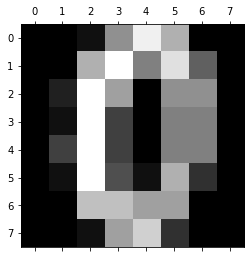

In [3]:
digits = load_digits()
plt.gray() 
plt.matshow(digits.images[10]) 
plt.show()

In [4]:
X_true = digits.images[10]

Прогоним один разок и посмотрим что выходит

In [5]:
pca = PCA(n_components=7)
pca.fit(X_true) 
X_pca = pca.transform(X_true)
X_pca

array([[ 1.38519212e+01, -1.13630085e+00,  1.79524025e+00,
         3.39685565e+00,  1.88619493e-01,  6.89577908e-02,
         0.00000000e+00],
       [ 2.40127061e+00,  8.60676182e+00, -1.60411201e+00,
         1.11512346e+00, -2.43957086e-01, -1.04768196e-02,
         0.00000000e+00],
       [-8.30153043e+00,  2.00557501e+00, -3.18528133e+00,
        -3.59051311e-01, -2.15221559e-01, -4.57991420e-01,
         0.00000000e+00],
       [-9.18639865e+00, -3.04474246e+00, -2.99718273e-01,
         6.21263831e-01, -8.12174049e-01,  1.29342444e+00,
         0.00000000e+00],
       [-9.49828006e+00, -3.33633775e+00, -5.91024886e-01,
         9.60882613e-01,  1.66339044e+00, -2.84258087e-01,
         0.00000000e+00],
       [-6.75326054e+00, -1.03107001e+00,  4.20642494e+00,
        -3.94545480e-01, -9.74782471e-01, -8.65585876e-01,
         0.00000000e+00],
       [ 4.33682805e+00,  3.15021836e+00,  2.63149521e+00,
        -3.36824740e+00,  8.21628356e-01,  5.40246225e-01,
         0.0000000

In [6]:
X_pred = pca.inverse_transform(X_pca)
X_pred

array([[ 0.00000000e+00, -4.66293670e-15,  1.00000000e+00,
         9.00000000e+00,  1.50000000e+01,  1.10000000e+01,
        -2.66453526e-15,  0.00000000e+00],
       [ 0.00000000e+00, -4.21884749e-15,  1.10000000e+01,
         1.60000000e+01,  8.00000000e+00,  1.40000000e+01,
         6.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  2.00000000e+00,  1.60000000e+01,
         1.00000000e+01, -1.77635684e-15,  9.00000000e+00,
         9.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00,  1.60000000e+01,
         4.00000000e+00, -5.32907052e-15,  8.00000000e+00,
         8.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  4.00000000e+00,  1.60000000e+01,
         4.00000000e+00, -7.99360578e-15,  8.00000000e+00,
         8.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00,  1.60000000e+01,
         5.00000000e+00,  1.00000000e+00,  1.10000000e+01,
         3.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -5.329070

In [7]:
mean_squared_error(X_true, X_pred)

1.5147053826616733e-29

In [10]:
n_components = [2,3,4,5,6,7]
for component in n_components:
    pca = PCA(n_components = component)
    pca.fit(X_true) 
    X_pred = pca.inverse_transform(pca.transform(X_true))
    print(f'n_components = {component}')
    print(mean_squared_error(X_true, X_pred))

n_components = 2
1.3718369022842563
n_components = 3
0.5949564425996346
n_components = 4
0.13228517549580718
n_components = 5
0.04828611154857035
n_components = 6
1.5697099418733727e-29
n_components = 7
1.5147053826616733e-29


## Домашнее задание "Математический анализ. Производная"

In [18]:
x = sym.var('x')
df = sym.diff(x**5+4*sym.sin(2*x)+sym.cos(3*x+3),x)
df

5*x**4 - 3*sin(3*x + 3) + 8*cos(2*x)

In [21]:
ddf = sym.diff(x**5+4*sym.sin(2*x)+sym.cos(3*x+3),x, 2)
ddf

20*x**3 - 16*sin(2*x) - 9*cos(3*(x + 1))

In [22]:
df.subs(x,1)

8*cos(2) - 3*sin(6) + 5

In [24]:
ddf.subs(x,1)

-16*sin(2) - 9*cos(6) + 20

**Теперь построим график**

In [25]:
dsin = sym.diff((sym.sin(2*x+1))**5,x)
dsin

10*sin(2*x + 1)**4*cos(2*x + 1)

(-5.0, 5.0)

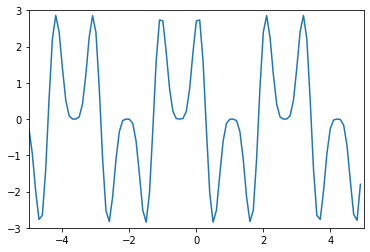

In [33]:
var_x = np.arange(-5, 5, 0.1)
var_dy = [dsin.subs(x,i) for i in var_x]
plt.plot(var_x, var_dy)
plt.ylim([-3, 3])
plt.xlim([-5, 5])

In [26]:
ddsin = sym.diff((sym.sin(2*x+1))**5,x, 2)
ddsin

20*(-sin(2*x + 1)**2 + 4*cos(2*x + 1)**2)*sin(2*x + 1)**3

(-5.0, 5.0)

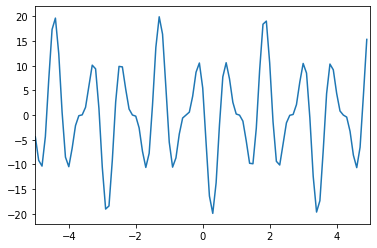

In [39]:
var_ddy = [ddsin.subs(x,i) for i in var_x]
plt.plot(var_x, var_ddy)
plt.ylim([-22, 22])
plt.xlim([-5, 5])

## Домашнее задание "Производная функции нескольких аргументов"

In [41]:
y = sym.var('y')
dpx = sym.diff(2*(x**2)*(y**3) + 1/x + x*y**2 + 7, x)
dpx

4*x*y**3 + y**2 - 1/x**2

In [42]:
dpy = sym.diff(2*(x**2)*(y**3) + 1/x + x*y**2 + 7, y)
dpy

6*x**2*y**2 + 2*x*y

In [44]:
grad_f = [dpx, dpy]
print(grad_f)

[4*x*y**3 + y**2 - 1/x**2, 6*x**2*y**2 + 2*x*y]


In [48]:
grad_fxy = [dpx.subs([(x,1),(y,2)]), dpy.subs([(x,1),(y,2)])]
grad_fxy

[35, 28]

Для второй функции все аналогично, писать мне уже было немного лениво)

**Теперь реализуем градиентный спуск**

Сорри, мне очень не хотелось подглядывать в лекции, так что я решил вспомнить молодость и закодить его целиком самостоятельно, получилось довольно забавно. Сначала я вообще хотел сделать все в духе Matlab через SymPy, но в процессе пришлось реализовать это более pythonic через обычные функции. 

In [48]:
x, y =sym.symbols('x y')
func = x**2 + y**2

learning_rate = 0.1
previous_x, current_x = 201, 200
previous_y, current_y = 201, 200

In [49]:
def f(k1, k2):
    return func.subs([(x, k1),(y, k2)])

def gx(k1):
    return func_grad_x.subs(x, k1)

def gy(k2):
    return func_grad_y.subs(y, k2)

In [50]:
step_count = 30
for i in range(step_count):
    current_x = previous_x - learning_rate * gx(previous_x)
    current_y = previous_y - learning_rate * gx(previous_x)
    previous_x = current_x
    previous_y = current_y
print(f'После {step_count} шагов значение функции равно {f(current_x, current_y)}')

После 30 шагов значение функции равно 0.123828704693046


## Домашнее задание "Теория оптимизации"

In [3]:
def ackley(X):
    arg1 = -0.2 * np.sqrt(0.5 * (X[0] ** 2 + X[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * X[0]) + np.cos(2. * np.pi * X[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

Для начала посмотрим на график. Matplotlib мне показался некрасивым и с ужасным синтаксисом и я решил использовать Plotly.

In [35]:
n = np.linspace(-10, 10, 50)

z_values = []
for i in range(0, len(n)):
    row_x = np.full(len(n), n[i])
    row_xy = np.array(list(zip(row_x, n)))
    acl = np.array([ackley(row_xy[i]) for i in range(0, len(n))])
    z_values.append(acl)

In [37]:
fig = go.Figure(data=[go.Surface(z = z_value)])
fig.update_layout(title='Ackley', autosize=True, margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [39]:
bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [41]:
result.nit

90

Разберемся с параметрами differential_evolution(func, bounds, args=(), strategy='best1bin', maxiter=1000, popsize=15, tol=0.01, mutation=0.5, 1, recombination=0.7, seed=None, callback=None, disp=False, polish=True, init='latinhypercube', atol=0, updating='immediate', workers=1, constraints=())

* bounds оценки для переменных. Есть два способа указать границы: как экземпляр класса Bounds или (min, max) пары для каждого элемента в X, определяющие нижнюю и верхнюю границы для оптимизации. len(bounds) == len(x).
* strategystr метод оптимизации ‘best1bin’, ‘best1exp’, ‘rand1exp’,         ‘randtobest1exp’, ‘currenttobest1exp’, ‘best2exp’, ‘rand2exp’, ‘randtobest1bin’,         ‘currenttobest1bin’, ‘best2bin’, ‘rand2bin’, ‘rand1bin’
* maxiterint максимальное количество поколений, в течение которых развивается популяция.
* popsize  максимальный размер популяции
* tol относительная погрешность
* mutation  константа мутации (дифференциальный вес, обозначаемый буквой F). Если указан как число F должен находиться в диапазоне [0, 2]. Увеличение константы мутации увеличивает радиус поиска, но замедляет сходимость.
* recombination константа рекомбинации (вероятность кроссовера, обозначается CR) должна быть в диапазоне [0, 1]. Увеличение этого значения позволяет большему количеству мутантов перейти в следующее поколение, но с риском стабильности популяции.
* disp печатает вычисленную функцию на каждой итерации
* polish если True (default), то scipy.optimize.minimize использует метод L-BFGS-B для улучшения результатов. 
* init тип начальной инициализации популяции - ‘latinhypercube’ или ‘random’
* atol абсолютная погрешность
* updating если  выставлено ‘immediate’ то вектор наилучшего решения постоянно обновляется в пределах одного поколения. Это может привести к более быстрой сходимости. При выборе 'deferred' вектор наилучшего решения обновляется один раз за поколение. Только 'deferred' совместимо с распараллеливанием.
* workers использование мультипроцессинга.  Поставьте -1, чтобы использовать все доступные ядра ЦП



При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции: strategy, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.
Дополнительное задание.

Найти множество параметров (strategy=..., ..., updating=...), которые требуют минимального количества итераций.


In [5]:
bounds = [(-10, 10), (-10, 10)]

In [6]:
method_list = ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp', 'best2exp', 'rand2exp', 'randtobest1bin', 'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin']

In [9]:
nit_list = []
for metod in method_list:
    result = differential_evolution(ackley, bounds, strategy=metod, seed=42)
    nit_list.append(result.nit)

In [10]:
nit_list

[90, 147, 246, 156, 1000, 244, 341, 101, 1000, 166, 232, 168]

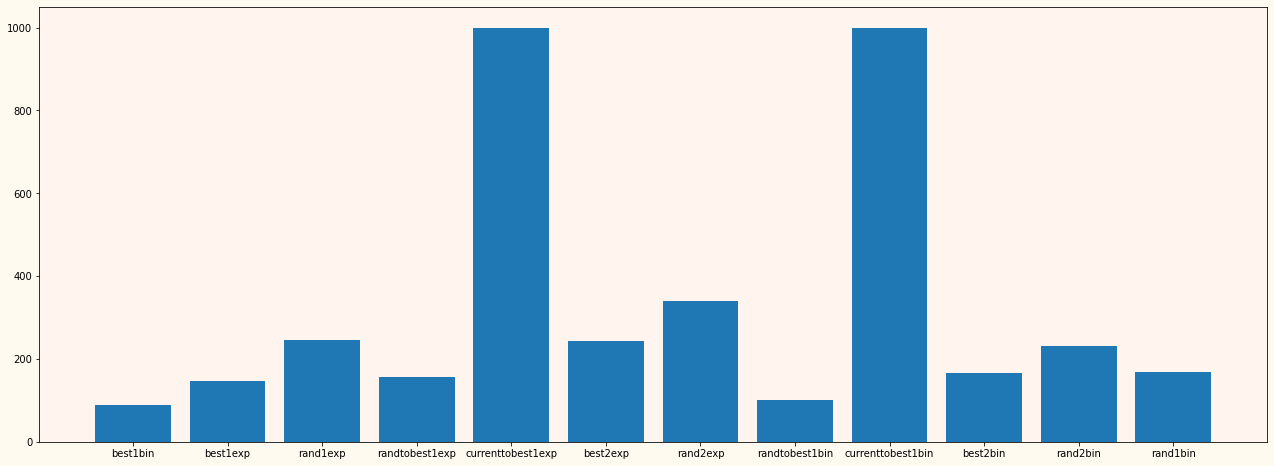

In [13]:
fig, ax = plt.subplots()
ax.bar(method_list, nit_list)

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(22)    #  ширина Figure
fig.set_figheight(8)    #  высота Figure

plt.show()

In [18]:
popsize = [i for i in range(10, 20)]

In [19]:
nit_list = []
for i in popsize:
    result = differential_evolution(ackley, bounds, popsize = i, seed=42)
    nit_list.append(result.nit)

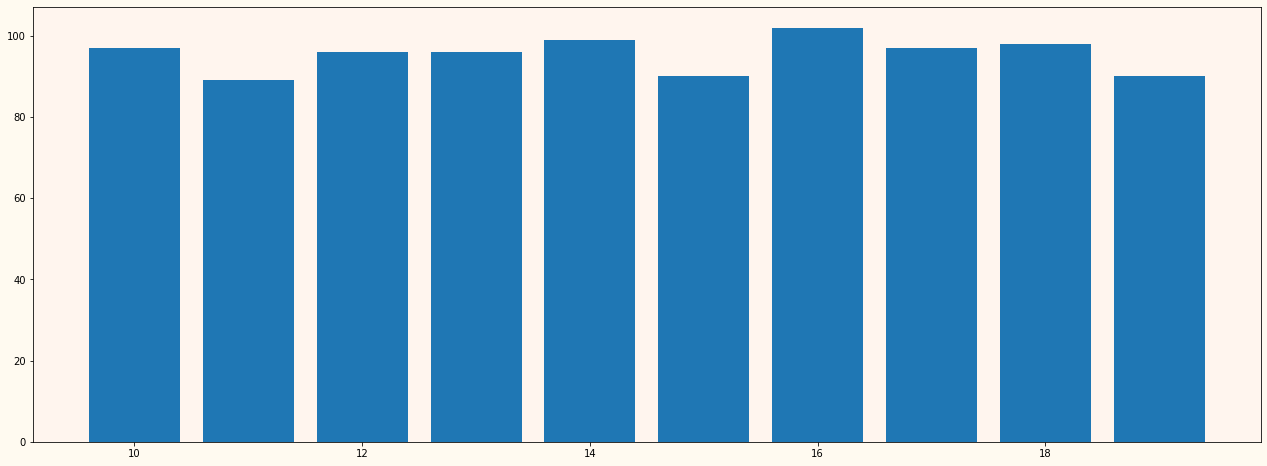

In [20]:
fig, ax = plt.subplots()
ax.bar(popsize, nit_list)

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(22)    #  ширина Figure
fig.set_figheight(8)    #  высота Figure

plt.show()

In [36]:
F = np.linspace(0.1, 2, 20)

In [37]:
nit_list = []
for i in range(0, len(F)-1):
    result = differential_evolution(ackley, bounds, mutation=F[i], seed=42)
    nit_list.append(result.nit)

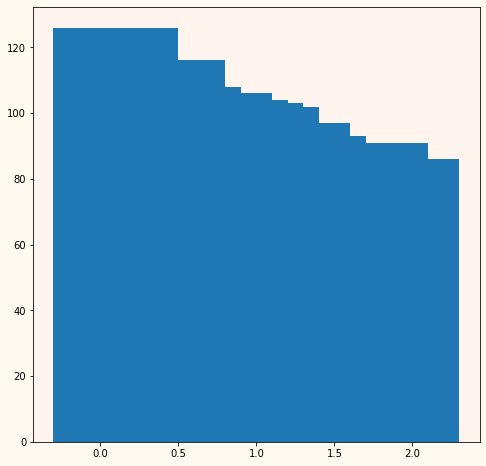

In [45]:
x = [F[i] for i in range(0, len(F)-1)]
fig, ax = plt.subplots()
ax.bar(x, nit_list)

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(8)    #  ширина Figure
fig.set_figheight(8)    #  высота Figure

plt.show()

In [40]:
CR = np.linspace(0.1, 1, 20)

In [42]:
nit_list = []
for i in range(0, len(CR)-1):
    result = differential_evolution(ackley, bounds, recombination=CR[i], seed=42)
    nit_list.append(result.nit)

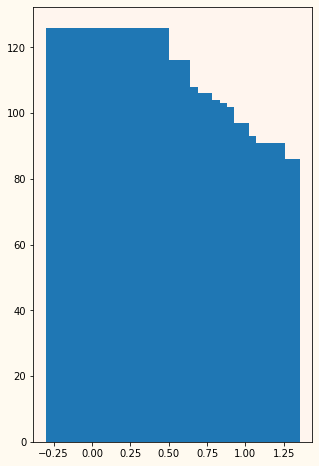

In [44]:
x = [CR[i] for i in range(0, len(F)-1)]
fig, ax = plt.subplots()
ax.bar(x, nit_list)

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(5)    #  ширина Figure
fig.set_figheight(8)    #  высота Figure

plt.show()

**Оптимальные параметры**

In [47]:
result = differential_evolution(ackley, bounds, popsize=11, mutation=0.1, recombination=1, seed=42)
result

     fun: 3.1365385844139837e-09
     jac: array([2.30901804, 2.75011942])
 message: 'Optimization terminated successfully.'
    nfev: 250
     nit: 6
 success: True
       x: array([-7.62483619e-10,  8.05203587e-10])

**Итак мы улучшили наш результат в 15 раз, с 90 до 6!**